In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/customer-segmentation-tutorial-in-python'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
dataset = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
dataset.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [10]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# Select relevant features for clustering (assuming 'Annual Income (k$)' and 'Spending Score (1-100)')
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

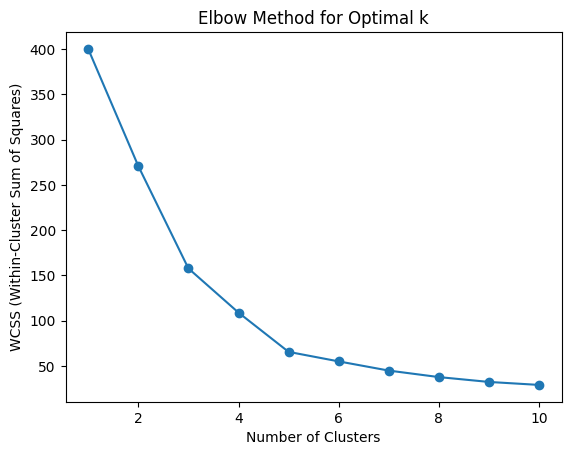

In [14]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [15]:
# Based on the Elbow Method, choose an optimal value for k (number of clusters)
optimal_k = 5

In [16]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# Add cluster labels to the dataset
dataset['Cluster'] = clusters

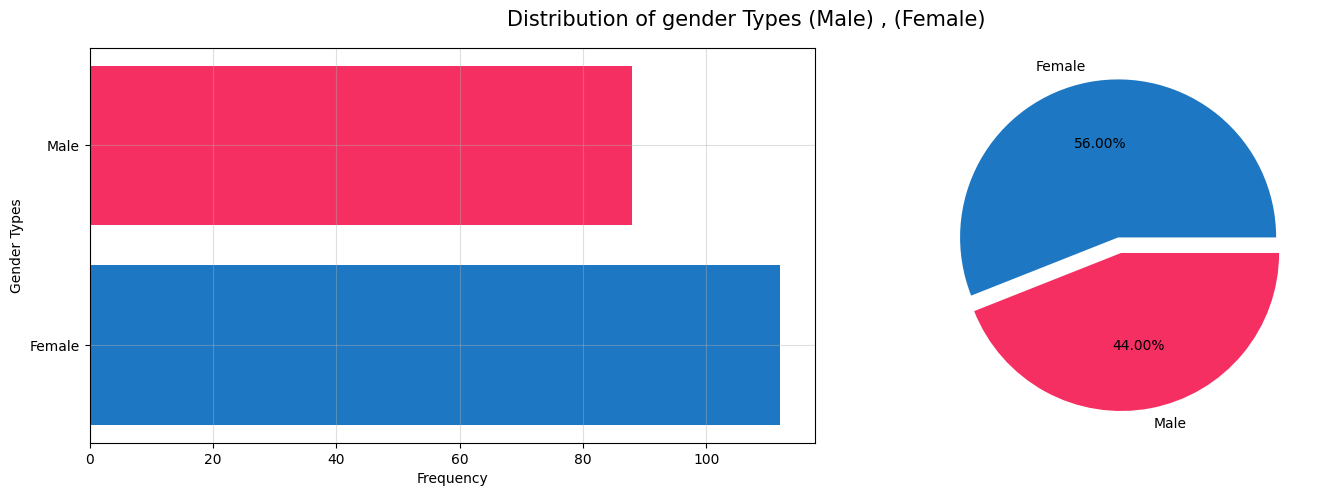

In [18]:
#Distribution of gender Types

types = dataset['Gender'].value_counts()
colors = ['#1D77C3', '#F62F63']

# Create a two-subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart on the first subplot
ax1.barh(y=types.index, width=types.values, color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Gender Types')
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(types.values, labels=types.index, explode=([0.05] * len(types.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of gender Types (Male) , (Female)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

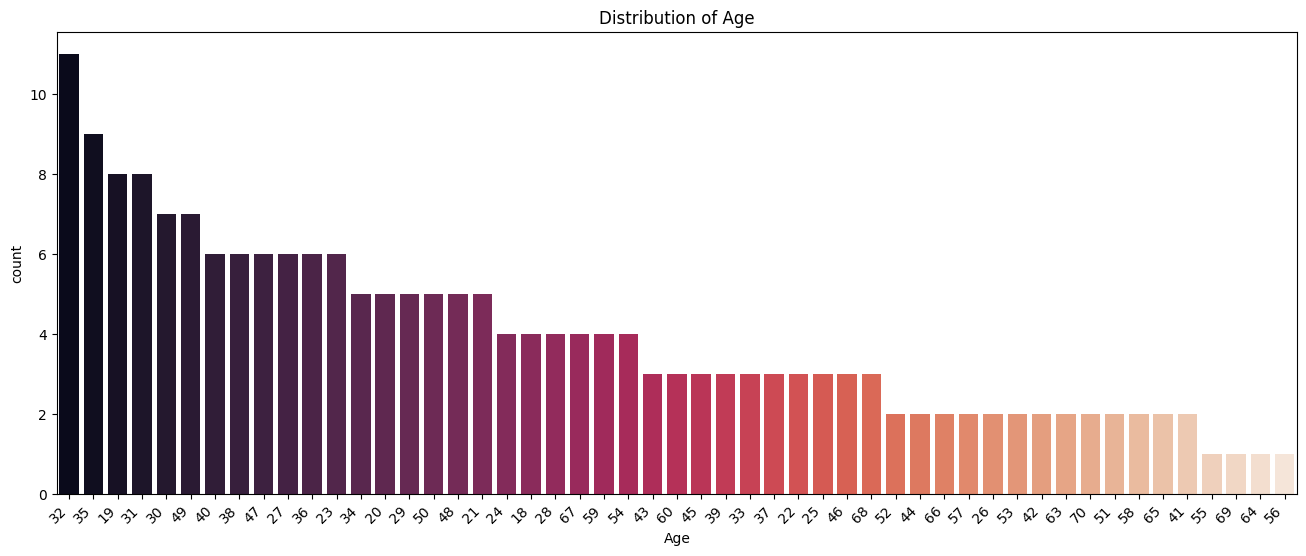

In [19]:
#Distribution of Age

rocket_palette = sns.color_palette("rocket", n_colors=len(dataset['Age'].value_counts().index))

plt.figure(figsize=(16, 6))
sns.countplot(x="Age", data=dataset,
              order=dataset['Age'].value_counts().index,
              palette=rocket_palette)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.show()

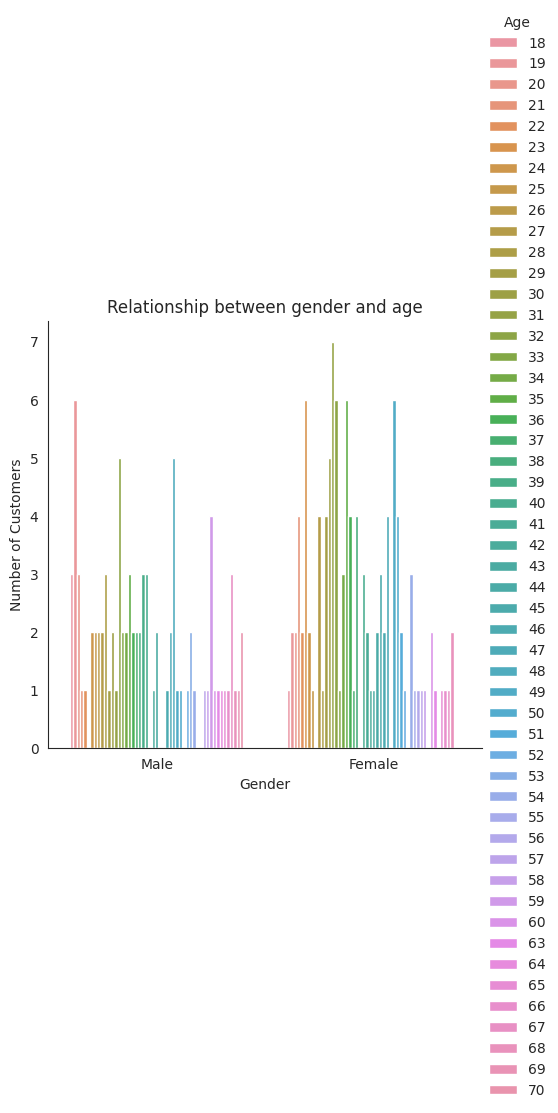

In [20]:
#Relationship between gender and age

# Set white background style
sns.set_style("white")

# Create the count plot with 'Gender' on the x-axis and 'Age' as hue
ax = sns.catplot(x='Gender', hue='Age', kind='count', data=dataset)

# Customize the plot (optional)
plt.xlabel('Gender')  # Set the x-axis label
plt.ylabel('Number of Customers')  # Set the y-axis label
plt.title('Relationship between gender and age')  # Set the plot title

# Show the plot
plt.show()

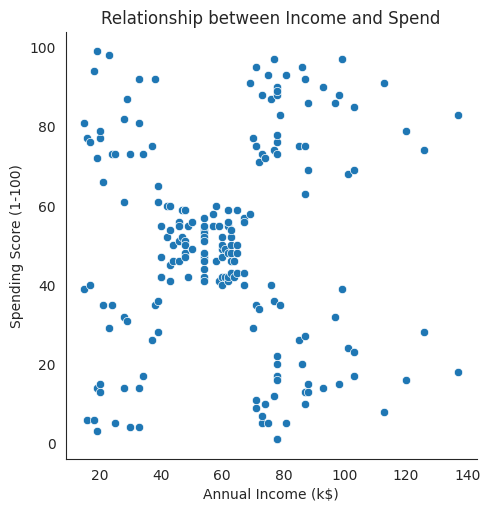

In [21]:
# Create the scatter plot
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", kind="scatter", data=dataset)

# Customize the plot
plt.title("Relationship between Income and Spend")  # Set the plot title

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


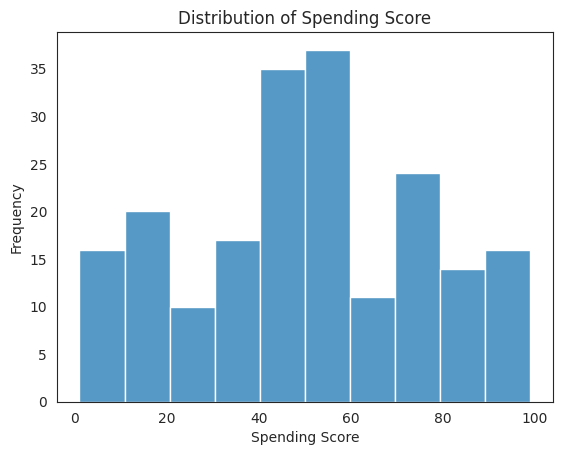

In [22]:
# Create a histogram of the spending score
sns.histplot(dataset["Spending Score (1-100)"], bins=10)

# Add a title and labels
plt.title("Distribution of Spending Score")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")

# Show the plot
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

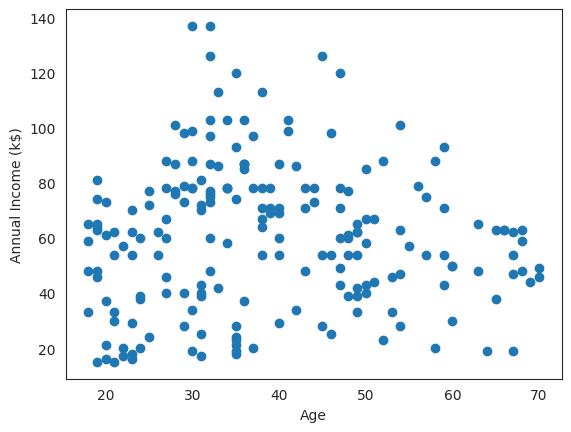

In [23]:
plt.scatter(dataset.Age,dataset['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

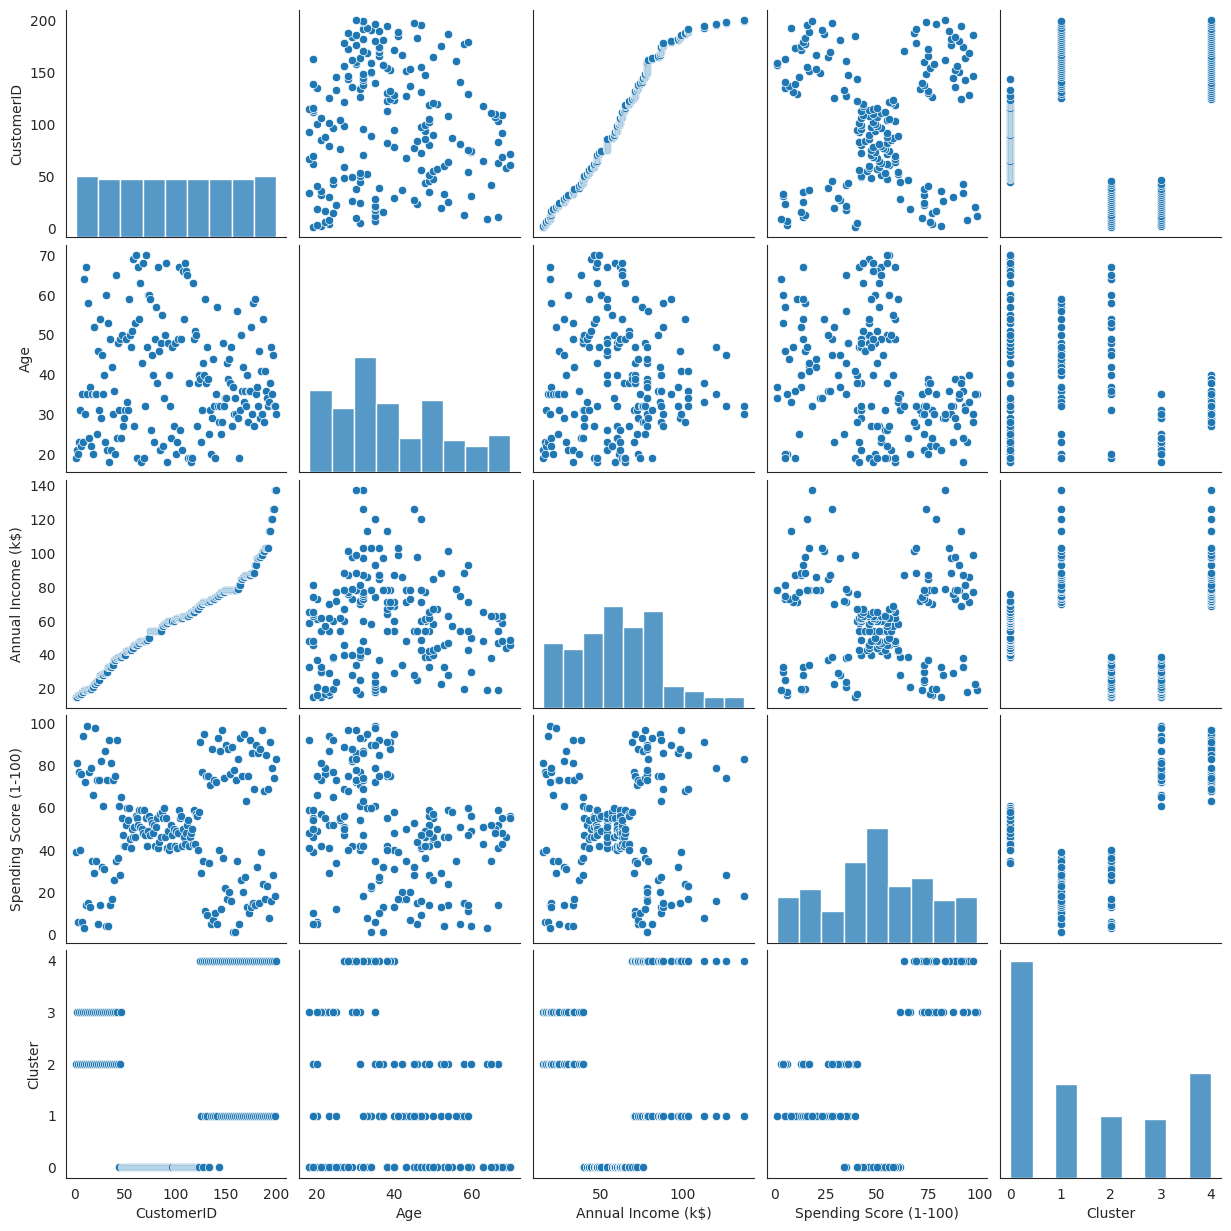

In [24]:
sns.pairplot(dataset)

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
cluster

AgglomerativeClustering(affinity='euclidean')

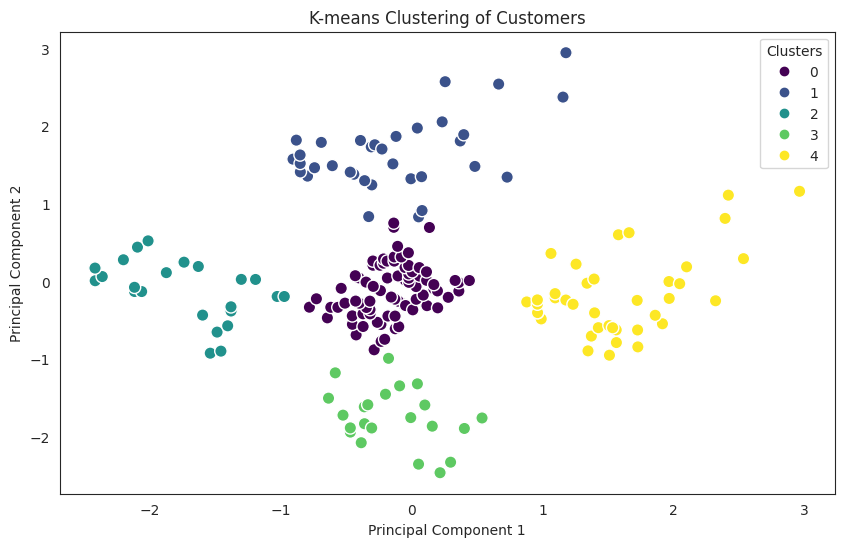

In [26]:
# Visualize the clusters using a 2D scatter plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolors='w', s=80)
plt.title('K-means Clustering of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()